In [1]:
import numpy as np
import matplotlib.pyplot as plt
from traffic import *
import cProfile

# Reproduce test case (Figure 1)

In [2]:
L = 100
ITERATIONS=150
initial_cars = np.ones(L, dtype=int) * -1
initial_cars[:10] = 0

all_cars = calculate_cars(
    initial_cars, 
    iterations=ITERATIONS, 
    p_slowdown=0.6, 
    vmax_fast=5, 
    seed=0xDECAFBAD
)

# Add spaces so all arrays are aligned
L_numofdigits = len(str(L))

def print_ln(n, cars):
    # Add more spaces depending on how many digits are in this iteration number, so all rows align
    n_numofdigits = len(str(n))
    space = ' ' * (L_numofdigits - n_numofdigits)
    
    print(n, space, str(cars).replace('-1', '.').replace(' ', '').replace('\n', ''))

for n, cars in enumerate(all_cars[:6]):
    print_ln(n, cars)

# Break between first 6 and last 6 iterations
print('.\n.')

for n, cars in enumerate(all_cars[-6:]):
    print_ln(n+ITERATIONS-5, cars)

0    [0000000000..........................................................................................]
1    [0000000000..........................................................................................]
2    [0000000000..........................................................................................]
3    [0000000000..........................................................................................]
4    [000000000.1.........................................................................................]
5    [000000000..1........................................................................................]
.
.
145  [5......4........4...................5......5...........5....................000.1...................]
146  [.....5.....4........4...................4......4............5...............00.1..2.................]
147  [..........5....4.........5..................4......4.............5..........0.1.1...2...............]
148  [..............4...

# Number of iterations to reach a steady state

In [7]:
iterations = np.arange(0, 1000)
cars_set = np.array([])

DENSITY = 0.3
L = 400
VMAX = 5
ITERATIONS = 2000

# Number of cars required
N_cars = np.floor(L * DENSITY).astype(int)

initial_cars = np.array([0 if n < N_cars else -1 for n in range(L)], dtype=int)

cars = calculate_cars(initial_cars, iterations=ITERATIONS, vmax_fast=VMAX)

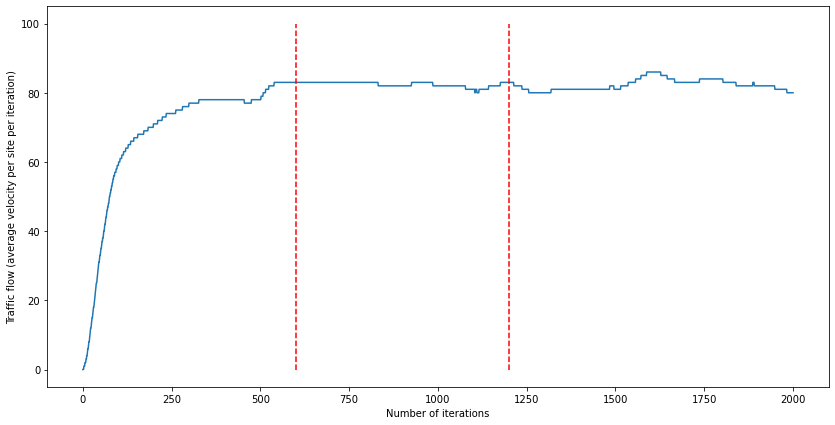

In [8]:
velocities = np.clip(cars, 0, None)
flow = np.sum(velocities, axis=1)
iteration_range = np.arange(0, ITERATIONS+1)

for i in range(1, ITERATIONS+1):
    flow[i] = np.sum(velocities[np.clip(i-500, 0, None).astype(int):i]) / (i if i < 500 else 500)

figure=plt.figure(figsize=(14, 7))
plt.plot(iteration_range, flow)
plt.plot([600, 600], [0, 100], 'r--')
plt.plot([1200, 1200], [0, 100], 'r--')
plt.xlabel('Number of iterations')
plt.ylabel('Traffic flow (average velocity per site per iteration)')
plt.savefig('traffic flow vs number of iterations.png')
plt.show()

# Flow diagrams (Figures 2 and 6)

### Without slowing (Figure 3)

In [9]:
L = 400
POINTS = 60
ITERATIONS = 1000

Calculate traffic flow (takes  <b>~2 minutes.</b>). I have run this code and saved it to a file, which can be loaded in the "load variables from file" cell below

In [21]:
x, mean_flow, std = calculate_flows(points=POINTS, L=L, iterations=ITERATIONS)

# ------Save files-------
X_FILE_PATH = 'x.npy'
MEAN_FLOW_FILE_PATH = 'mean_flow.npy'
STD_FILE_PATH = 'std.npy'

np.save(X_FILE_PATH, x)
np.save(MEAN_FLOW_FILE_PATH, mean_flow)
np.save(STD_FILE_PATH, std)

Load variables from file (much quicker)

In [20]:
X_FILE_PATH = 'x.npy'
MEAN_FLOW_FILE_PATH = 'mean_flow.npy'
STD_FILE_PATH = 'std.npy'

x = np.load(X_FILE_PATH)
mean_flow = np.load(MEAN_FLOW_FILE_PATH)
std = np.load(STD_FILE_PATH)

Plot the flow-density diagram

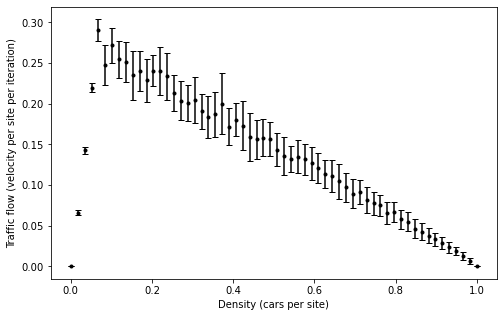

In [11]:
plt.figure(figsize=(8, 5))
plt.errorbar(x, mean_flow, xerr=None, yerr=std, fmt='.', color='black', capsize=3)
plt.xlabel('Density (cars per site)')
plt.ylabel('Traffic flow (velocity per site per iteration)')

plt.savefig('Basic traffic flow image with errorbars.png', dpi=300)
plt.show()

Find highest mean flow, and density at which this occurs

In [12]:
index = mean_flow.argmax()

highest_mean_flow_x = x[index]
highest_mean_flow_xerr = (x[index+1] - x[index]) / 2

highest_mean_flow = mean_flow[index]
highest_mean_flow_std = std[index]

print(f'Highest mean flow is {highest_mean_flow} ± {highest_mean_flow_std}, which occurs at x={highest_mean_flow_x} ± {highest_mean_flow_xerr}')

Highest mean flow is 0.29057356608478807 ± 0.013070457427261381, which occurs at x=0.06779661016949153 ± 0.008474576271186439


### With slowing (Figure 4)

In [13]:
L = 400
POINTS = 60
ITERATIONS=1000

Calculate flow with slowing. This cell takes <b>~3 minutes</b> to run. Again, I have included a "load" cell.

In [ ]:
x, mean_flow_slow, std_slow = calculate_flows(points=POINTS, L=L, iterations=ITERATIONS, slowed=True)

# ------Save files-------
X_FILE_PATH = 'x.npy'
MEAN_FLOW_SLOW_FILE_PATH = 'mean_flow_slow.npy'
STD_SLOW_FILE_PATH = 'std_slow.npy'

np.save(X_FILE_PATH, x)
np.save(MEAN_FLOW_SLOW_FILE_PATH, mean_flow_slow)
np.save(STD_SLOW_FILE_PATH, std_slow)

Load

In [ ]:
X_FILE_PATH = 'x.npy'
MEAN_FLOW_SLOW_FILE_PATH = 'mean_flow_slow.npy'
STD_SLOW_FILE_PATH = 'std_slow.npy'

x = np.load(X_FILE_PATH)
mean_flow_slow = np.load(MEAN_FLOW_SLOW_FILE_PATH)
std_slow = np.load(STD_SLOW_FILE_PATH)

Plot flows with slowing

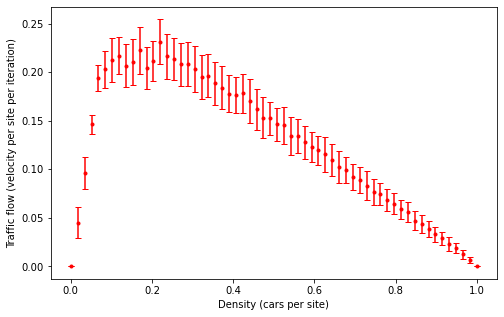

In [15]:
plt.figure(figsize=(8, 5))
plt.errorbar(x, mean_flow_slow, xerr=None, yerr=std_slow, fmt='.', color='red', capsize=3)
plt.xlabel('Density (cars per site)')
plt.ylabel('Traffic flow (velocity per site per iteration)')

plt.show()

Find highest mean flow, and density at which this occurs

In [18]:
index_slow = mean_flow_slow.argmax()

highest_mean_flow_slow_x = x[index_slow]
highest_mean_flow_slow_xerr = (x[index_slow+1] - x[index_slow]) / 2

highest_mean_flow_slow = mean_flow_slow[index_slow]
highest_mean_flow_slow_std = std_slow[index_slow]

print(f'Highest mean flow when slowed is {highest_mean_flow_slow} ± {highest_mean_flow_slow_std},', \
    f'which occurs at x={highest_mean_flow_slow_x} ± {highest_mean_flow_slow_xerr}')

Highest mean flow when slowed is 0.23147132169576057 ± 0.022868316526296506, which occurs at x=0.22033898305084745 ± 0.008474576271186446


### Plot with both
This plots the slowed traffic and non-slowed traffic on the same figure.

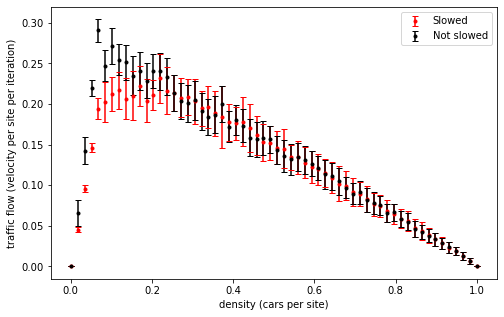

In [17]:
plt.figure(figsize=(8, 5))
plt.errorbar(x, mean_flow_slow, xerr=None, yerr=std, fmt='.', color='red', capsize=3, label='Slowed')
plt.errorbar(x, mean_flow, xerr=None, yerr=std_slow, fmt='.', color='black', capsize=3, label='Not slowed')
plt.xlabel('density (cars per site)')
plt.ylabel('traffic flow (velocity per site per iteration)')
plt.legend()

plt.savefig('basic traffic flow image with errorbars and slowing.png', dpi=300)
plt.show()

# Traffic jam (Figure 3)

### Without slowing


In [19]:
delta_x = 8
ITERATIONS = 50
L = 75
density = 0.2

# Create initial cars array. Probability of 0.1 that a site has a car in it. Cars have random velocities from 1 to 5
initial_cars = np.ones(L, dtype=int) * -1
initial_cars[7] = 5
initial_cars[12] = 5
initial_cars[20] = 5
initial_cars[26] = 5
initial_cars[33] = 5
initial_cars[36] = 0
initial_cars[37] = 0
initial_cars[39] = 1
initial_cars[46] = 5

all_cars = calculate_cars(initial_cars, ITERATIONS, vmax_slow=2, vmax_fast=5, slowed=False)

for n, cars in enumerate(all_cars):
    # Add spaces so all arrays are aligned
    L_numofdigits = len(str(L))
    n_numofdigits = len(str(n))
    space = ' ' * (L_numofdigits - n_numofdigits)
    
    print(n, space, str(cars).replace('-1', '.').replace(' ', '').replace('\n', ''))

0   [.......5....5.......5.....5......5..00.1......5............................]
1   [...........4....4........5.....5...200...2........4........................]
2   [..............3......5.......4....3000......3..........5...................]
3   [..................4......4......3.0000.........3...........4...............]
4   [......................4.......5.0.000.1............4...........4...........]
5   [...........................5...1.1000...2...............5..........4.......]
6   [..............................30.0000......3................4...........5..]
7   [.4............................0.1000.1........3..................5.........]
8   [.....4........................0.0000...2.........3...................4.....]
9   [.........4....................0.000.1....2..........3....................4.]
10  [...5..........5................1000...2....2...........3...................]
11  [........5..........5...........000.1....2....2.............4...............]
12  [...........

### With slowing

In [20]:
delta_x = 8
ITERATIONS = 50
L = 100

# Create initial cars array
initial_cars = np.ones(L, dtype=int) * -1

# Populate initial cars array
for i in range(L):
    if i % delta_x == 0:
        initial_cars[i] = 5

all_cars = calculate_cars(initial_cars, ITERATIONS, vmax_slow=2, vmax_fast=5, slowed=True)

for n, cars in enumerate(all_cars):
    # Add spaces so all arrays are aligned
    L_numofdigits = len(str(L))
    n_numofdigits = len(str(n))
    space = ' ' * (L_numofdigits - n_numofdigits)
    
    print(n, space, str(cars).replace('-1', '.').replace(' ', '').replace('\n', ''))

0    [5.......5.......5.......5.......5.......5.......5.......5.......5.......5.......5.......5.......5...]
1    [.....5......4........5.......5.......5...1.......1...........5......4.......4........5......4......3]
2    [..3.......5.....4........4........5....2...2......1..............4.......5.......5........5.....4...]
3    [.5...3........4......5.......4.......3..1....2......2.................5......4........5........5....]
4    [5...3...3.........4.......5.......5...1...2...1.......2...................4......4........4.........]
5    [..2....3...3...........5.......5....2..1....2..1........2.....................4......4........4.....]
6    [....2.....3...3............4.......4.1..1....1..1.........2........................5......5........5]
7    [...4..2.....2....3..............5...1.1...2...1...2........1...........................4.......5....]
8    [.....2..2.....2......4.............30..1....2...2..1........1...............................5......4]
9    [...4...2..2......3....

# Lanes (Figures 7 and 8)

### 1 value of density (Figure 7)

In [21]:
L = 50
initial_cars = np.ones((L, 2), dtype=int) * -1
initial_cars[9, 0] = 5
initial_cars[6, 1] = 5
initial_cars[12, 0] = 5
initial_cars[20, 0] = 5
initial_cars[26, 0] = 5
initial_cars[33, 0] = 5
initial_cars[36, 0] = 2
initial_cars[37, 0] = 0
initial_cars[39, 0] = 1
initial_cars[46, 0] = 5

all_cars = calculate_cars_lanes(initial_cars, iterations=7, p_slowdown=0)

# Print 
for n, cars in enumerate(all_cars):
    # Add spaces so all arrays are aligned
    L_numofdigits = len(str(L))
    n_numofdigits = len(str(n))
    space = ' ' * (L_numofdigits - n_numofdigits)
    
    print(n, space, str(cars[:, 0]).replace('-1', '.').replace(' ', '').replace('\n', ''))

    space2 = ' ' * (L_numofdigits + 1)
    print(space2, str(cars[:, 1]).replace('-1', '.').replace(' ', '').replace('\n', ''))

0   [.........5..5.......5.....5......5..20.1......5...]
    [......5...........................................]
1   [.5.........2.....5.......5.....5......1..2........]
    [...........5.........................15...........]
2   [......5.......3.......5.......5.....5...2...3.....]
    [................5....................0.....5......]
3   [...........5......4........5.......5...3...3....4.]
    [.....................5................1.........5.]
4   [...5............5......5........5.....3...3....4..]
    [...5......................5.............2.........]
5   [..5.....5............5......5........5...3....4...]
    [........5......................5...........3......]
6   [.5.....5.....5............5......5...........4....]
    [.............5......................5.....5....4..]
7   [5.....5.....5.....5............5......5...........]
    [..5...............5......................5....4...]


### Flow diagram (Figure 8)

In [2]:
L = 400
POINTS = 60
ITERATIONS = 1000

Takes <b>~27 minutes</b>. Again, I have saved these to a file.

In [3]:
x, mean_flow_lanes, std_lanes = calculate_flows(points=POINTS, L=L, iterations=ITERATIONS, lanes=True)

# ------Save files-------
X_FILE_PATH = 'x.npy'
MEAN_FLOW_LANES_FILE_PATH = 'mean_flow_lanes.npy'
STD_LANES_FILE_PATH = 'std_lanes.npy'

np.save(X_FILE_PATH, x)
np.save(MEAN_FLOW_LANES_FILE_PATH, mean_flow_lanes)
np.save(STD_LANES_FILE_PATH, std_lanes)

Load variables from file (so code doesn't need to run again)

In [4]:
X_FILE_PATH = 'x.npy'
MEAN_FLOW_LANES_FILE_PATH = 'mean_flow_lanes.npy'
STD_LANES_FILE_PATH = 'std_lanes.npy'

x = np.load(X_FILE_PATH)
mean_flow_lanes = np.load(MEAN_FLOW_LANES_FILE_PATH)
std_lanes = np.load(STD_LANES_FILE_PATH)

Plot the flow-density diagram

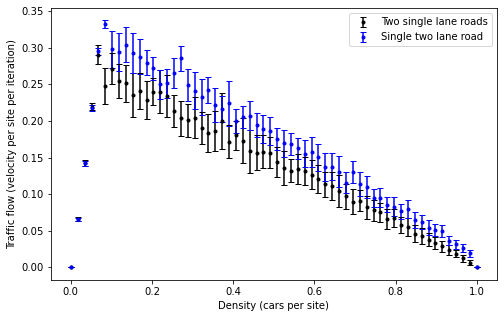

In [17]:
plt.figure(figsize=(8, 5))
plt.errorbar(x, mean_flow, xerr=None, yerr=std, fmt='.', color='black', capsize=3, label='Two single lane roads')
plt.errorbar(x, mean_flow_lanes, xerr=None, yerr=std_lanes, fmt='.', color='blue', capsize=3, label='Single two lane road')
plt.xlabel('Density (cars per site)')
plt.ylabel('Traffic flow (velocity per site per iteration)')
plt.legend()

plt.savefig('lanes traffic flow image with errorbars.png', dpi=300)
plt.show()

Find highest mean flow, and density at which this occurs

In [19]:
index = mean_flow_lanes.argmax()
highest_mean_flow_lanes_x = x[index]
highest_mean_flow_lanes = mean_flow_lanes[index]
highest_mean_flow_lanes_error = std_lanes[index]

print(f'Highest mean flow is {highest_mean_flow_lanes} ± {highest_mean_flow_lanes_error}, which occurs at x={highest_mean_flow_lanes_x}')

# [1:-1] because first term and last term divide by 0
lanes_nonlanes_ratio = np.sum(mean_flow_lanes[1:-1]) / np.sum(mean_flow[1:-1])
print(f'Traffic flow is on average higher by {lanes_nonlanes_ratio * 100 - 100}%')

Highest mean flow is 0.3323004987531172 ± 0.00516475198754899, which occurs at x=0.0847457627118644
Traffic flow is on average higher by 20.895559425902462%
